In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
generada=np.load('/content/drive/MyDrive/data_gen.npy')

In [5]:
generada.shape

(10000, 1071)

In [6]:
generada[0,:]

array([0.00189723, 0.03168193, 0.01447275, ..., 0.00044526, 0.00044526,
       0.00235362], dtype=float32)

In [7]:
generada[0,:].sum()

77.08417

In [8]:
original=np.load('/content/drive/MyDrive/binmedgan.matrix', allow_pickle=True)

In [9]:
original.shape


(46520, 1071)

In [10]:
original[0,:].sum()

6.0

In [11]:
generada_bin=generada.copy()

In [12]:
for i in range(generada_bin.shape[0]):
    for j in range(generada_bin.shape[1]):
        
        if generada_bin[i,j]>0.5:
            generada_bin[i,j]=1
        else:
            generada_bin[i,j]=0

In [13]:
generada_bin

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
generada_bin.sum()

104576.0

In [15]:
original.sum()

524096.0

In [16]:
ceros=np.zeros((10000,1), dtype=float)
unos= np.ones((10000,1), dtype=float)

In [17]:
dataset=original[:10000, :]

In [18]:
print(dataset.shape)
dataset= np.append(dataset,ceros,axis=1)
print(dataset.shape)

(10000, 1071)
(10000, 1072)


In [19]:
generada_bin.shape


(10000, 1071)

In [20]:
generada_bin=np.append(generada_bin, unos, axis=1)
generada_bin.shape

(10000, 1072)

In [21]:
all_dataset=np.append(dataset, generada_bin, axis=0)
all_dataset.shape

(20000, 1072)

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split


In [23]:
np.random.seed(21)
np.random.shuffle(all_dataset)

In [24]:
all_dataset[:100,-1]

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
                            all_dataset[:,:-1], all_dataset[:,-1], test_size=0.25, random_state=21)

In [26]:
print("X_train: ", X_train.shape, "\nX_test: ",X_test.shape, "ys: ",y_test.shape, y_train.shape)

X_train:  (15000, 1071) 
X_test:  (5000, 1071) ys:  (5000,) (15000,)


In [27]:
!pip install scikit-plot

In [28]:
from sklearn.metrics import accuracy_score
import scikitplot as skplt
import matplotlib.pyplot as plt


def Compute_acc(y_pred, y_prob=0, auc=False):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    if auc:
        # ground truth labels
        y_probas = y_prob# predicted probabilities generated by sklearn classifier
        skplt.metrics.plot_roc_curve(y_test, y_probas)
        plt.show()
    

Number of mislabeled points out of a total 5000 points : 2013
Accuracy:  0.5974


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


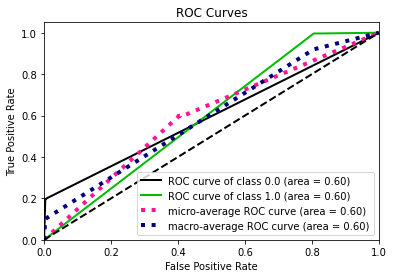

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_naive = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred_naive).sum()))

Compute_acc(y_pred=y_pred_naive, auc=True, y_prob=gnb.predict_proba(X_test) )

Accuracy:  0.7492


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


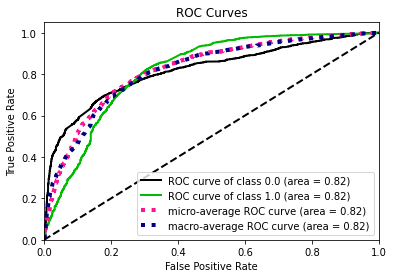

In [30]:
from sklearn.linear_model import LogisticRegression

logR= LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_pred_log=logR.predict(X_test)
Compute_acc(y_pred=y_pred_log, y_prob= logR.predict_proba(X_test), auc=True)

Accuracy:  0.822


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


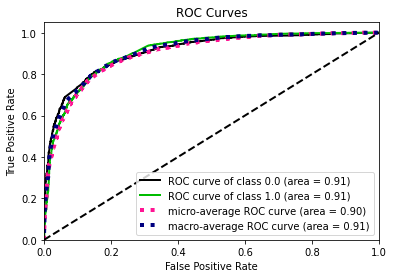

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_train,y_train)

Compute_acc(y_pred=clf.predict(X_test), y_prob=clf.predict_proba(X_test), auc=True)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Accuracy:  0.8398


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


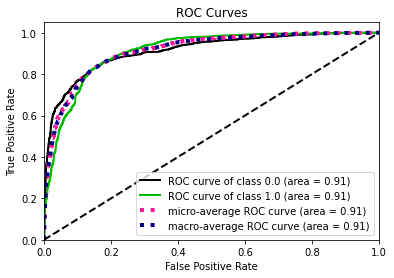

In [32]:
import lightgbm as lgb

clf= lgb.LGBMClassifier(boost_from_average=True, max_depth=100, num_iterations=10000)
  
clf.fit(X_train, y_train)
Compute_acc(y_pred=clf.predict(X_test), y_prob=clf.predict_proba(X_test), auc=True)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def accTest(m, regresa=False, val=.5):
    
    y_pred = m.predict(x_test)
    pred = list()
    for i in range(len(y_pred)):
        if(y_pred[i]>=val):
            pred.append(1)
        else:
            pred.append(0)

    test=list(y_test)
    
    a = accuracy_score(pred,test)
    print('Accuracy is:', a*100)
    
    CM = confusion_matrix(test, pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    precision=TP/(TP+FP)
    exha= TP/(TP+FN)
    print("TruePositive: ", TP,
         "\nTrueNEgative: ",TN,
         "\nFalsePos: ",FP,
         "\nFalseNeg: ",FN,
         "\nPrecisión: ", precision,
         "\nExhaustividad: ", exha,
         "\nF1 Score: ", (precision*exha)/(precision+exha))
    if regresa:
        return y_pred, a, CM


In [102]:
X_train.shape

(15000, 1071)

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [105]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [133]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)
batch=next(iter(train_loader))
batch[0].shape

torch.Size([64, 1071])

In [134]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(1071, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        print(inputs.shape)
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [135]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [136]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


binaryClassification(
  (layer_1): Linear(in_features=1071, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [137]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [150]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        print("###############", e)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        #print("2")
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch {e+0:03}:  Loss: {epoch_loss/len(train_loader):.5f}  Acc: {epoch_acc/len(train_loader):.3f}')

Se han truncado las últimas 5000 líneas del flujo de salida.
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
############### 40
torch.Size([64, 1071])
###############

In [151]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

Se han truncado las últimas 5000 líneas del flujo de salida.
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 1071])
torch.Size([1, 

In [152]:
confusion_matrix(y_test, y_pred_list)

array([[1922,  566],
       [ 283, 2229]])

In [153]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      2488
         1.0       0.80      0.89      0.84      2512

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

